<a href="https://colab.research.google.com/github/Shadowk1ngX/Raspberry_Doctor/blob/main/BerryCounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics supervision==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [7]:
!pip install -q ultralytics supervision==0.18.0

In [8]:
import numpy as np
import supervision as sv

from ultralytics import YOLO
from supervision.assets import download_assets, VideoAssets

In [9]:
SOURCE_VIDEO_PATH = f"{HOME}/TestVideo.mp4"

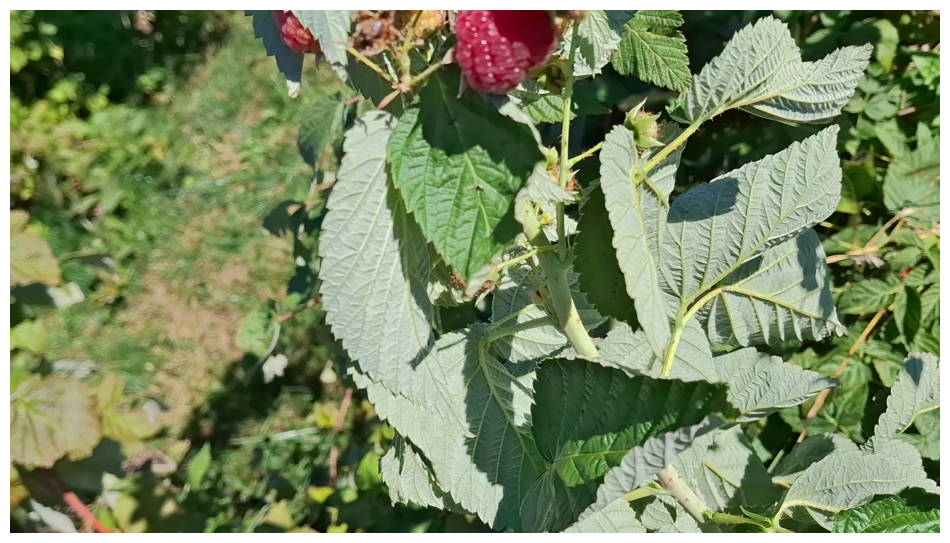

In [10]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(generator)

sv.plot_image(frame, (12, 12))

In [11]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1920, height=1080, fps=29, total_frames=194)

In [12]:
model = YOLO("weights.pt")

results = model(frame, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

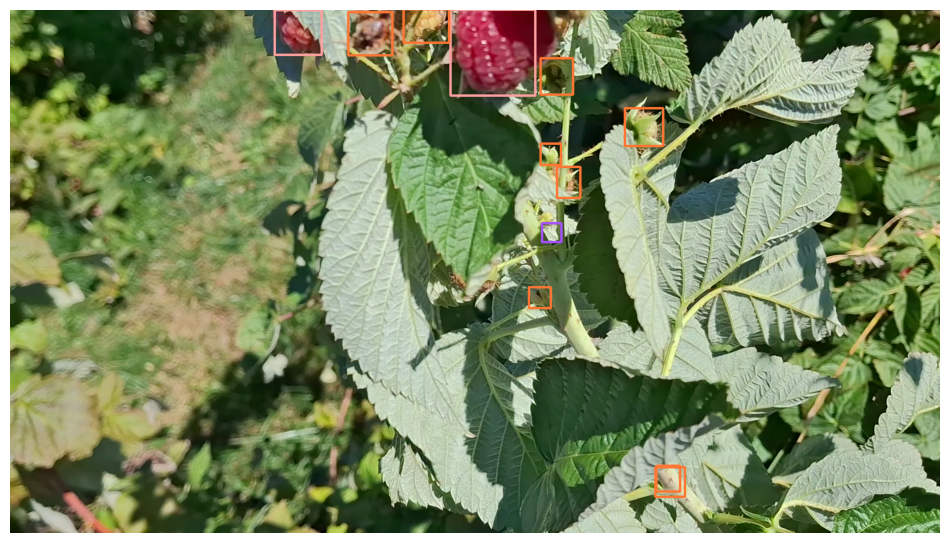

In [13]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
annotated_frame = bounding_box_annotator.annotate(frame.copy(), detections)
sv.plot_image(annotated_frame, (12, 12))

['Ripe Berries 0.79', 'Ripe Berries 0.78', 'Unripe Berries 0.77', 'Unripe Berries 0.60', 'Unripe Berries 0.46', 'Unripe Berries 0.42', 'Unripe Berries 0.31', 'Unripe Berries 0.30', 'Unripe Berries 0.28', 'Buds 0.27', 'Unripe Berries 0.27', 'Unripe Berries 0.26']
[2 2 3 3 3 3 3 3 3 0 3 3]


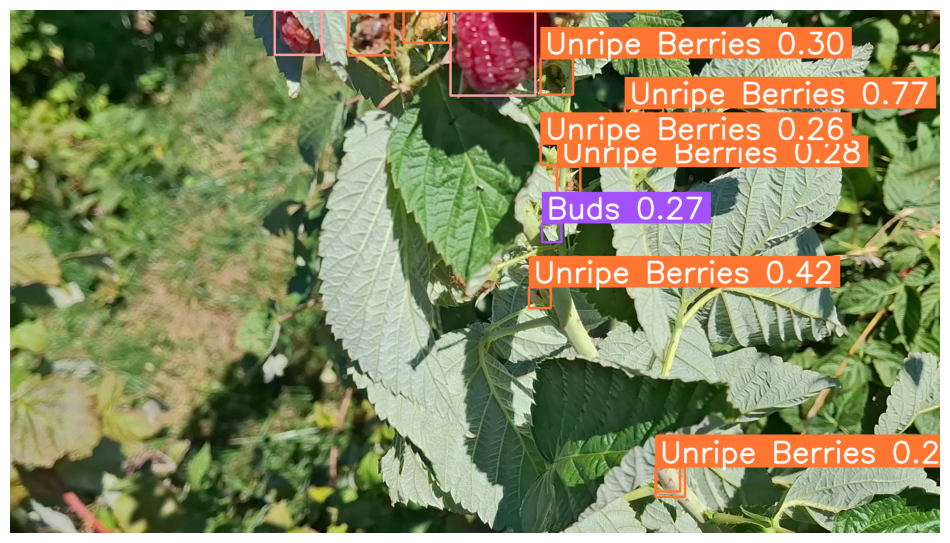

In [36]:
labels = [
    f"{results.names[class_id]} {confidence:0.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]
print(labels)
print(detections.class_id)

bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)

annotated_frame = frame.copy()
annotated_frame = bounding_box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
sv.plot_image(annotated_frame, (12, 12))

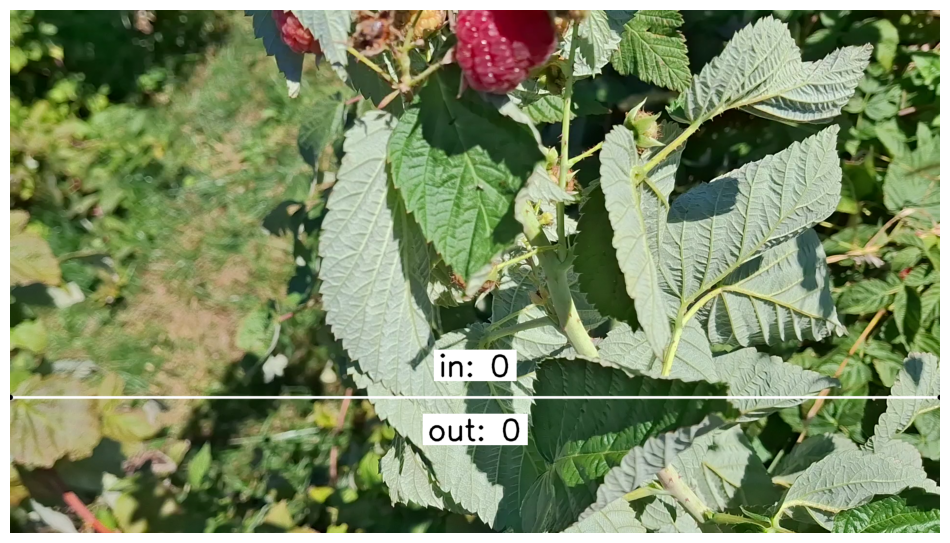

In [40]:
'''deoInfo = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
VIDEO_WIDTH = VideoInfo.width
VIDEO_HEIGHT = VideoInfo.height

START = sv.Point(VIDEO_WIDTH // 2, 0)  # Middle top
END = sv.Point(VIDEO_WIDTH // 2, VIDEO_HEIGHT)  # Middle bottom

line_zone = sv.LineZone(start=START, end=END)


line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2,

    )

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))'''

START = sv.Point(0, 800)
END = sv.Point(1920, 800)

line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

In [22]:
byte_tracker = sv.ByteTrack()

In [23]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
trace_annotator = sv.TraceAnnotator(thickness=4)

In [41]:
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    results = model(frame, verbose=False)[0]  # Run YOLO model
    detections = sv.Detections.from_ultralytics(results)  # Convert detections

    # ✅ Filter detections to keep only specific classes
    TARGET_CLASSES = [2]  # Example: 0 = 'person', 2 = 'car' (change as needed)
    mask = np.isin(detections.class_id, TARGET_CLASSES)  # Boolean mask for filtering
    detections = detections[mask]  # Apply mask to keep only target classes

    # Update tracking with filtered detections
    detections = byte_tracker.update_with_detections(detections)

    # Generate labels for visualization
    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    # Annotate frame with detections
    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = bounding_box_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    # ✅ Trigger line zone with filtered detections
    line_zone.trigger(detections)

    # Return annotated frame with the counting line
    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)


In [25]:
TARGET_VIDEO_PATH = f"{HOME}/count-objects-crossing-the-line-result.mp4"

In [42]:
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)